In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
link = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(link)
print("successful import")


successful import


In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


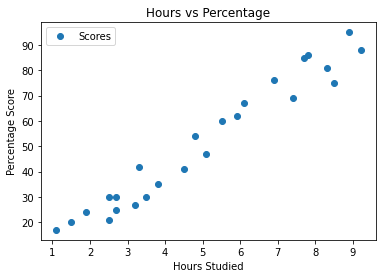

In [11]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

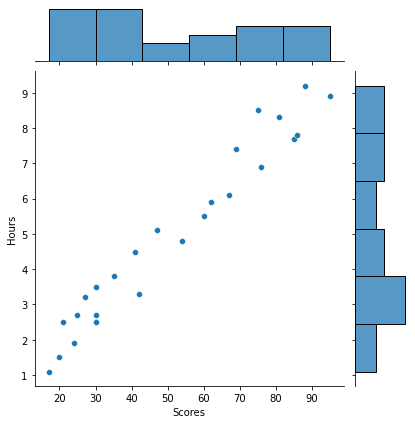

In [12]:
sns.jointplot(y= 'Hours' ,x='Scores', data= df)

### Data Preprocessing

In [13]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Model Training

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
model = LinearRegression()  
model.fit(x_train.reshape(-1,1), y_train)
print('done')

done


### Predictions 

In [15]:
# Testing data
print(x_test)
# Model Prediction 
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
newDF = pd.DataFrame({'Reg':y_test , 'Predicted':y_pred})
newDF

,Reg,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#Estimating training and test score
print("Training Score:",model.score(x_train,y_train)*100,'%')


Training Score: 95.15510725211553 %


In [18]:
print("Test Score:",model.score(x_test,y_test) * 100,'%')

Test Score: 94.54906892105356 %


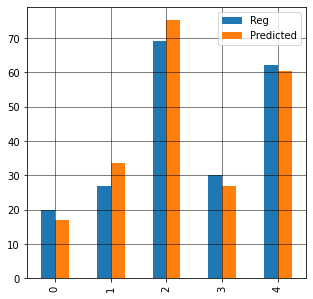

In [19]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

newDF.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='black')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [20]:
# testing the given sample 
hours = 9.25
newTest=np.array([hours])
newTest = newTest.reshape(-1,1)
newPred = model.predict(newTest)

In [21]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(newPred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [22]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
